# "Anticipez les besoins en consommation électrique de bâtiments"
_Notebook_

## 0 Preliminaries

### 0.0 Importing Packages and Modules

Checking whether the notebook is on Colab or PC

In [1]:
import sys
is_colab = 'google.colab' in sys.modules
is_colab, sys.executable

(True, '/usr/bin/python3')

Mounting my Drive if on colab

In [2]:
if is_colab==True:
    from google.colab import files, output, drive
    drive.mount('/gdrive')
    %cd /gdrive
    print("You're on Google Colab")
else:
    print("You're on a PC")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive
You're on Google Colab


Noticing user about files that has to be in the current working directory.

In [3]:
def file_required(file_name):
    if os.path.exists(os.getcwd()+"/"+file_name):
        print("OK, loading "+file_name+"\
                           from the current working directory ...")
    else:
        print("Please, put "+file_name+"\
                           in the current working directory")

Installations and importations required for Google Colab version.

In [4]:
# !pip freeze > requirements.txt

In [5]:
import os

if is_colab==True:
    if os.getcwd()!='/gdrive/My Drive/--DATA SCIENCE/PROJET4':
        os.chdir('My Drive/--DATA SCIENCE/PROJET4')
    !pip install -r requirements.txt
else:
    # make sure 'P4_functions.py' is in the current working directory
    file_required('/P4_functions.py')
    file_required('requirements.txt')
    !pip install -r requirements.txt

     |████████████████████████████████| 32.4MB 131kB/s 
     |████████████████████████████████| 133kB 45.1MB/s 
     |████████████████████████████████| 6.3MB 58.9MB/s 
     |████████████████████████████████| 81kB 8.0MB/s 
     |████████████████████████████████| 163kB 52.8MB/s 
     |████████████████████████████████| 880kB 42.1MB/s 
     |████████████████████████████████| 2.0MB 54.0MB/s 
     |████████████████████████████████| 7.5MB 39.7MB/s 
     |████████████████████████████████| 163kB 56.1MB/s 
     |████████████████████████████████| 3.0MB 42.4MB/s 
     |████████████████████████████████| 61kB 5.7MB/s 
     |████████████████████████████████| 368kB 46.9MB/s 
     |████████████████████████████████| 29.8MB 93kB/s 
     |████████████████████████████████| 1.1MB 44.2MB/s 
     |████████████████████████████████| 307kB 51.8MB/s 
     |████████████████████████████████| 92kB 7.0MB/s 
     |████████████████████████████████| 1.3MB 55.1MB/s 
     |████████████████████████████████| 8.0MB 46.1MB/s 

In [6]:
from P4_functions import *

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Importation of modules and packages. 

In [7]:
import io
from time import time

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.facecolor']='w'

import warnings
warnings.filterwarnings('ignore')

# from ipywidgets import interact, interact_manual

import dill

from sklearn_pandas import DataFrameMapper

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_pca_correlation_graph
from sklearn.inspection import permutation_importance

import category_encoders as ce

import scipy.stats as st

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import *
from sklearn import metrics
from sklearn.compose import make_column_transformer

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR

Setting pandas display options

In [8]:
dictPdSettings = {'display.max_rows': 500, 'display.width': 100,
                    'display.max_colwidth': 500,
                    'display.float_format': lambda x: '%.2f' % x}
for k,v in dictPdSettings.items():
    pd.set_option(k,v)

To play audio text-to-speech during execution.

In [9]:
from IPython.display import Audio
from gtts import gTTS

def speak(text, lang='en'):
    with io.BytesIO() as f:
        gTTS(text=text, lang=lang).write_to_fp(f)
        f.seek(0)
        return Audio(f.read(), autoplay=True)

In [10]:
plot_enabled = False
save_enabled = False

In [11]:
speak('Packages and modules successfully imported')

### 0.1 Importing the dataset

In [12]:
if is_colab==True:
    path_csv = 'DATA/Cleaned_data.csv' 
    # Importing database from my Drive
    print("2. Try to import in notebook from myDrive...")
else:
    path_csv = '../DATA/Cleaned_data.csv'
    # Importing database from a DATA directory
    print("2. Try to import in notebook from PC ('DATA')")

df = pd.read_csv(path_csv, sep=',', index_col='Unnamed: 0',
                 low_memory=True, encoding ='utf-8')

print("-----> importation of .csv in the notebook OK")

2. Try to import in notebook from myDrive...
-----> importation of .csv in the notebook OK


In [13]:
df['ZipCode'] = df['ZipCode'].apply(str).astype('object')
df['CouncilDistrictCode'] = df['CouncilDistrictCode'].apply(str).astype('object')

In [14]:
speak('Dataset successfully imported')

### 0.2 Overview

In [15]:
df.shape

(1651, 65)

In [16]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified', 'ENERGYSTARScore',
       'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier', 'ZipCode', 'La

Printing total nb and percentage of null

In [17]:
print_null_pct(df)

nb of null:  2191 
pct of null:  2.0


Showing columns where there are still NaN values

In [18]:
df.isna().sum(axis=0)[df.isna().sum(axis=0)!=0]

TaxParcelIdentificationNumber       1
ENERGYSTARScore                   542
Comments                         1648
dtype: int64

In [19]:
speak('Description overview done')

## 1 Data preprocessing

### 1.1 Target data transformation

We already found in the Cleaning_EDA notebook that the distribution of the target data could become almost normal with logarithmic transformation.

Here are the histograms of transformed values.

#### SiteEnergyUseWN(kBtu)

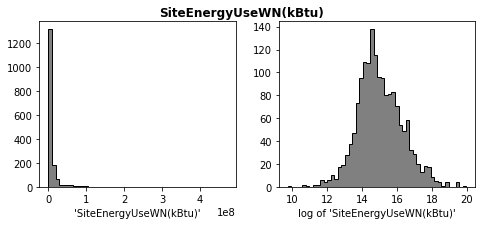

In [20]:
fig, axs = plt.subplots(1,2)
axs[0].hist(df['SiteEnergyUseWN(kBtu)'], color='grey', ec='k',
            histtype='stepfilled', bins=50);
axs[0].set_xlabel("'SiteEnergyUseWN(kBtu)'")
axs[1].hist(df['SiteEnergyUseWN(kBtu)_log'], color='grey', ec='k',
            histtype='stepfilled', bins=50);
axs[1].set_xlabel("log of 'SiteEnergyUseWN(kBtu)'")


plt.tight_layout(rect=[0,0,1,0.95])
fig.suptitle('SiteEnergyUseWN(kBtu)', fontweight='bold')
fig.set_size_inches(7,3)
plt.show()

#### TotalGHGEmissions

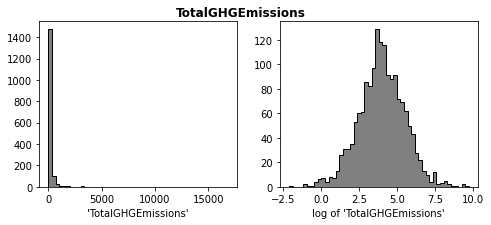

In [21]:
fig, axs = plt.subplots(1,2)
axs[0].hist(df['TotalGHGEmissions'], color='grey', ec='k',
            histtype='stepfilled', bins=50);
axs[0].set_xlabel("'TotalGHGEmissions'")
axs[1].hist(df['TotalGHGEmissions_log'], color='grey', ec='k',
            histtype='stepfilled', bins=50);
axs[1].set_xlabel("log of 'TotalGHGEmissions'")


plt.tight_layout(rect=[0,0,1,0.95])
fig.suptitle('TotalGHGEmissions', fontweight='bold')
fig.set_size_inches(7,3)
plt.show()

### 1.2 Features selection

In [22]:
prop_Q_cols = ['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
               'PropertyGFAParking', 'PropertyGFABuilding(s)',
               'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
               'ThirdLargestPropertyUseTypeGFA', 'BuildingAge',
               'MeanGFAperFloor', 'ParkingGFARatio', 'NbYearsCertified',
               'ExtsurfVolRatio',
            'Outlier'] # 'ENERGYSTARScore',
prop_C_cols = ['Neighborhood', 'ZipCode', 'CouncilDistrictCode',
               'BuildingType', 'PrimaryPropertyType', 'LargestPropertyUseType',
               'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType',
               'CertifiedPreviousYear', 'EnergyProfile', 'MainEnergy']
target_cols = ['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions',
                'SiteEnergyUseWN(kBtu)_log', 'TotalGHGEmissions_log']

__Quantitative data__

Excluding highly correlated quantitative features.
- 'PropertyGFATotal' is strongly correlated with 'PropertyGFABuilding(s)'
- 'PropertyGFABuilding(s)' is strongly correlated with 'LargestPropertyUseTypeGFA'
- 'ExtsurfVolRatio' is strongly correlated with 'NumberofBuildings'

In [23]:
# prop_Q_cols_sel = [c for c in prop_Q_cols if c not in\
#                               ['PropertyGFATotal',
#                                'PropertyGFABuilding(s)',
#                                'ExtsurfVolRatio']]

__Categorical data__

Excluding highly related categorical features.
- 'LargestPropertyUseType'(57) is strongly correlated with 'PrimaryPropertyType'(29)

In [24]:
# prop_C_cols_sel = [c for c in prop_C_cols if c not in ['LargestPropertyUseType']]

### 1.3 Splitting training and testing set 

In [25]:
df_X = df[prop_Q_cols+prop_C_cols]
df_y = df['SiteEnergyUseWN(kBtu)']
# df_y = df['TotalGHGEmissions']

We want to evaluate our model at the end on various 'BuildingType'.

We thus split the data with stratification using this column.

In [26]:
''' 'Neighborhood', 'CouncilDistrictCode', 'ZipCode', 'Outlier', 'BuildingType',
'PrimaryPropertyType', 'EnergyProfile', 'MainEnergy', 'CertifiedPreviousYear' '''

group_col = 'PrimaryPropertyType'

X_tr, X_te, y_tr, y_te = train_test_split(df_X, df_y,
                                            train_size=0.8, shuffle=True,
                                            stratify=df[group_col],
                                            random_state=14)

Printing the quantitative and categorical independent columns:

In [27]:
print(f'--- {X_tr.columns.shape[0]} independent columns ---\
\nquantitative ({len(prop_Q_cols)}): {prop_Q_cols},\
\ncategorical ({len(prop_C_cols)}): {prop_C_cols}')

--- 25 independent columns ---
quantitative (14): ['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'BuildingAge', 'MeanGFAperFloor', 'ParkingGFARatio', 'NbYearsCertified', 'ExtsurfVolRatio', 'Outlier'],
categorical (11): ['Neighborhood', 'ZipCode', 'CouncilDistrictCode', 'BuildingType', 'PrimaryPropertyType', 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType', 'CertifiedPreviousYear', 'EnergyProfile', 'MainEnergy']


In [28]:
# print("--- columns missing in prop_Q_cols_sel and prop_C_cols_sel ---\n" ,
#       set(X_tr.columns) - set(X_tr_sel.columns))

### 1.4 Feature transformations

We want to evaluate the impact of the transformation strategies for quantitative and categorical data. We'll split the columns in 4 types.

__Quantitative data__

Integers or float.

__Categorical data__

Categorical data are all nominal data, none of them are ordinal.
- Boolean : 'CertifiedPreviousYear'
- low cardinality (less than 12 categories):
'BuildingType', 'MainEnergy', 'EnergyProfile', 'Outlier'
- high cardinality (12 or more categories) :
('Neighborhood', 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType', 'PrimaryPropertyType')

The transformation of the columns is all included in the Class CustTransformer (see P4_funtions.py file), and the different encoding and transformation options are passed to the GridSearchCV or RandomizedSearchCV throudh the param_grid dictionnary.

## 2 First model selection

In [29]:
#  # TESTS RAPIDES
# my_knn = KNeighborsRegressor(n_neighbors=5)

# cust_trans = CustTransformer(thresh_card=12,
#                              strat_binary='ord',
#                              strat_low_card='ohe',
#                              strat_high_card='hash',
#                              strat_quant='stand').fit(X_tr, y_mod_tr)
# X_tr_enc = cust_trans.transform(X_tr)
# my_knn.fit(X_tr_enc, y_mod_tr)
# X_te_enc = cust_trans.transform(X_te)
# y_te_pr = my_knn.predict(X_te_enc)

# scores_reg('my_knn', X_te_enc, y_te, y_te_pr)

Creating a pickle if does not exist or use the existing pickle, and creates the dict_model dictionary that will contain all the models.

In [30]:
file_name = os.getcwd()+'/P4_models_log_SEU.pkl'

# If file of models exists, open and load in dict_model
if os.path.exists(file_name):
    with open(file_name, "rb") as f:
        dict_models = dill.load(f)
    print('Pickle containing models already existing:\n', dict_models.keys())
    print("Content loaded in 'dict_models'")

# Else create an empty dictionnary
else:
    dict_models = {}
    print('No pickle containing models.')
    print("Created an empty 'dict_models' ditionnary")

No pickle containing models.
Created an empty 'dict_models' ditionnary


Defining the scores depending on the choice of fitting y or log(y).

In [31]:
log1p_on = True

if log1p_on: # scores defined in P4_functions.py
    y_mod_tr, y_mod_te = np.log1p(y_tr), np.log1p(y_te)
    scorers = {'rev_log1p_neg_rmse': rev_log1p_rmse,
               'rev_log1p_neg_mae': rev_log1p_mae,
               'rev_log1p_r2': rev_log1p_r2}
    score_refit = 'rev_log1p_neg_rmse'
else:
    y_mod_tr, y_mod_te = y_tr, y_te
    scorers = ['neg_root_mean_squared_error', 
               'neg_mean_absolute_error',
               'r2']
    score_refit = 'neg_root_mean_squared_error' 

Defining :
- a dataframe to store the results,
- a splitter for the crossvalidation (stratified using the column group_col chosen before, for the train_test_split)
- a generic dictionary with the parameters passed to GridSearch or RandomSearch.

In [32]:
df_res = pd.DataFrame(dtype = 'object')
skf = list(StratifiedKFold(5).split(X_tr, X_tr[group_col]))
dict_scv_params = dict(data_preproc = CustTransformer(thresh_card=12),
                       X = X_tr,
                       y = y_mod_tr,
                       cv_search = skf,
                       scv_scores = scorers,
                       refit = score_refit)

### 2.1 KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

reg = KNeighborsRegressor()
name_reg = 'KNN_grid'
param_grid={'preproc__strat_binary': ['ord'],
            'preproc__strat_low_card': ['ohe'], # 'ohe', 'bin', 'ord', 'hash', 'loo'
            'preproc__strat_high_card': ['ohe', 'bin'], # 'ohe', 'bin', 'ord', 'hash', 'loo'
            'preproc__strat_quant': ['stand'], # 'stand', 'minmax', 'maxabs', 'robust', 'norm', 'quant_uni', 'quant_norm', 'pow'
            name_reg+'__n_neighbors': [1,2,3,5,7,9,11,15,17], # 1,2,3,5,7,9,11,15,17
            name_reg+'__p': [1,2]} # 0,1,2
search_strat = 'grid'
n_iter=50

df_res = run_optimization(name_reg, reg, param_grid, file_name, dict_models,
                          dict_scv_params, df_res, search_strat, n_iter)

-----Model not existing - computing...
Grid
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Showing variations of one score vs. multiple hyperparameters

In [ ]:
# gs = dict_models[name_reg]
# grid_params = param_grid
# params = ['KNN_grid__n_neighbors', 'KNN_grid__p']
# score=score_refit

# plot_hyperparam_tuning(dict_models[name_reg], param_grid, params=params,
#               score=score_refit, pooled_std=False, agg_func = np.mean)

Showing influence of hyperparameters (strategies) on one score.

In [ ]:
# param1 = name_reg+'__'+'n_neighbors'
# param2 = name_reg+'__'+'p'
# param3 = 'preproc__strat_high_card'
# params = [param1, param3]
# plot_2D_hyperparam_opt(scv=dict_models[name_reg], params=params,
#                        score = score_refit)

Showing the best parameters for differents scores

In [ ]:
# reg = dict_models[name_reg]
# param = name_reg+'__'+'n_neighbors'
# plot_scv_multi_scores(name_reg, reg, param,
#                       title = None, figsize = (12, 4))

In [ ]:
df_res.T

### 2.2 Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

reg = Ridge()
name_reg = 'Ridge_rand'
param_grid={'preproc__strat_binary': ['ord'],
            'preproc__strat_low_card': ['ohe', 'bin'], # 'ohe', 'bin', 'ord', 'hash', 'loo'
            'preproc__strat_high_card': ['bin', 'ord', 'hash', 'loo'], # 'ohe', 'bin', 'ord', 'hash', 'loo'
            'preproc__strat_quant': ['stand'], # 'stand', 'minmax', 'maxabs', 'robust', 'norm', 'quant_uni', 'quant_norm', 'pow'
            name_reg+'__alpha': st.loguniform(1e-7, 1e7)} # np.logspace(-7,7,20)
search_strat = 'rand'
n_iter=200

df_res = run_optimization(name_reg, reg, param_grid, file_name, dict_models,
                          dict_scv_params, df_res, search_strat, n_iter)

In [ ]:
df_res.T

### 2.3 Lasso

In [ ]:
from sklearn.linear_model import Lasso

reg = Lasso()
name_reg = 'Lasso_rand'
param_grid={'preproc__strat_binary': ['ord'],
            'preproc__strat_low_card': ['ohe', 'bin'], # 'ohe', 'bin', 'ord', 'hash', 'loo'
            'preproc__strat_high_card': ['bin', 'ord', 'hash', 'loo'], # 'ohe', 'bin', 'ord', 'hash', 'loo'
            'preproc__strat_quant': ['stand'], # 'stand', 'minmax', 'maxabs', 'robust', 'norm', 'quant_uni', 'quant_norm', 'pow'
            name_reg+'__alpha': st.loguniform(1e-7, 1e7)} # np.logspace(-7,7,20)
search_strat = 'rand'
n_iter=200

df_res = run_optimization(name_reg, reg, param_grid, file_name, dict_models,
                          dict_scv_params, df_res, search_strat, n_iter)

In [ ]:
df_res.T

### 2.4 ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet

reg = ElasticNet()
name_reg = 'ElasticNet_rand'
param_grid={'preproc__strat_binary': ['ord'],
            'preproc__strat_low_card': ['ohe', 'bin'], # 'ohe', 'bin', 'ord', 'hash', 'loo'
            'preproc__strat_high_card': ['ord', 'hash', 'loo'], # 'ohe', 'bin', 'ord', 'hash', 'loo'
            'preproc__strat_quant': ['stand'], # 'stand', 'minmax', 'maxabs', 'robust', 'norm', 'quant_uni', 'quant_norm', 'pow'
            name_reg+'__alpha': st.loguniform(1e-7, 1e7), # np.logspace(-7,7,20)
            name_reg+'__l1_ratio': st.uniform(0,1), # [0,0.15,0.3,0.45,0.6,0.75,1]
            name_reg+'__tol' : st.loguniform(1e-3, 1e0)} #np.logspace(-4,0,5)}
search_strat = 'rand'
n_iter=200

df_res = run_optimization(name_reg, reg, param_grid, file_name, dict_models,
                          dict_scv_params, df_res, search_strat, n_iter)

In [ ]:
df_res.T

### 2.5 Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()
name_reg = 'RandomForest_grid'
param_grid={'preproc__strat_binary': ['ord'],
            'preproc__strat_low_card': ['ohe', 'bin', 'hash'], # 'ohe', 'bin', 'ord', 'hash', 'loo'
            'preproc__strat_high_card': ['ord', 'hash', 'loo'], # 'ohe', 'bin', 'ord', 'hash', 'loo'
            'preproc__strat_quant': ['stand'], # 'stand', 'minmax', 'maxabs', 'robust', 'norm', 'quant_uni', 'quant_norm', 'pow'
            name_reg+'__n_estimators': [100,200,500],#,200,500,1000], # nb leaves
            name_reg+'__min_samples_leaf': [1,2,5,10], # mean nb leaves in a node
            name_reg+'__max_features': ['auto', 'sqrt']}#, 'sqrt']} # 'auto', 'sqrt' (nb features in a tree)
search_strat = 'grid'

df_res = run_optimization(name_reg, reg, param_grid, file_name, dict_models,
                          dict_scv_params, df_res, search_strat, n_iter)

In [ ]:
df_res.T

### 2.6 Support Vector Machine Regression

In [ ]:
from sklearn.svm import SVR

reg = SVR()
name_reg = 'SVR_grid'
param_grid={'preproc__strat_binary': ['ord'],
            'preproc__strat_low_card': ['ohe'], # 'ohe', 'bin', 'ord', 'hash', 'loo'
            'preproc__strat_high_card': ['ord', 'loo'], # 'ohe', 'bin', 'ord', 'hash', 'loo'
            'preproc__strat_quant': ['stand'], # 'stand', 'minmax', 'maxabs', 'robust', 'norm', 'quant_uni', 'quant_norm', 'pow'
            name_reg+'__kernel': ['rbf', 'linear', 'poly'], # kernel coef (radial basis function 'rbf')
            name_reg+'__gamma': ['auto'], # np.logspace(-8,0,9), # kernel coef (radial basis function 'rbf')
            name_reg+'__epsilon': np.logspace(-3,0,5), # accepted error
            name_reg+'__C': np.logspace(-2,2,5)} # regularization coef
search_strat = 'grid'

df_res = run_optimization(name_reg, reg, param_grid, file_name, dict_models,
                          dict_scv_params, df_res, search_strat, n_iter)

In [ ]:
df_res.T

### 2.7 XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor

reg = XGBRegressor(objective ='reg:squarederror')# 'reg:lineaqr' deprecated
name_reg = 'XGBR_grid'
param_grid={'preproc__strat_binary': ['ord'],
            'preproc__strat_low_card': ['ohe', 'bin', 'hash'], # 'ohe', 'bin', 'ord', 'hash', 'loo'
            'preproc__strat_high_card': ['ord', 'hash', 'loo'], # 'ohe', 'bin', 'ord', 'hash', 'loo'
            'preproc__strat_quant': ['stand'], # 'stand', 'minmax', 'maxabs', 'robust', 'norm', 'quant_uni', 'quant_norm', 'pow'
            name_reg+'__learning_rate': np.logspace(-3,-1,3),
            name_reg+'__n_estimators': [1000,2000], # [100,200,500,1000,2000]
            name_reg+'__max_depth': [3,4],
            name_reg+'__subsample': [0.8,1],
            name_reg+'__colsample_bytree': [0.3,0.8,1], # [0.3,0.5,0.8,0.9,1]
            name_reg+'__gamma': [1]}
search_strat = 'grid'

df_res = run_optimization(name_reg, reg, param_grid, file_name, dict_models,
                          dict_scv_params, df_res, search_strat, n_iter)

In [ ]:
df_res.T

In [ ]:
speak("youpi cé fini")

## 3 Comparison of the models
Plotting the main metrics of the optimized models obtained during SearchCV fitting (training/test folds)

In [ ]:
df_res

### Learning curves

In [ ]:
## LENT MAIS FONCTIONNE, prévoir différents types de lignes

# fig = None
# colors = sns.color_palette("dark", 10)
# %matplotlib
# for name, color in zip(dict_models.keys(), colors):
#     print(name,'...')
#     fig = plot_learning_curve(dict_models[name].best_estimator_, X_tr, y_mod_tr,
#                             train_sizes=np.linspace(0.1,1,30),
#                             scoring="neg_mean_squared_error", label=name,
#                             c=color, fig=fig) # to add the curve to existing figure
#     print('... -> done !')
    
# %matplotlib inline
# fig